In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

/kaggle/input/us-accidents/US_Accidents_Dec20.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

In [3]:
#Import the file
df=pd.read_csv("US_Accidents_Dec20.csv")
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
#Checking the sahp of our dataframe
df.shape

(4232541, 49)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [6]:
#Checking all the mathematical features of our dataset
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


### Writing a function to find the percentage of missing values in our dataframe.

In [7]:
def missing_values(df):
    
    #Total values missing
    missing_vals = df.isnull().sum()
    
    #percentage missing values
    mising_values_per = 100 * df.isnull().sum() / len(df)
    
    
    #make a dataframe
    missing_valu_table = pd.concat([missing_vals,mising_values_per], axis =1)
    
    #rename the columns
    miss_vals_table_renamed = missing_valu_table.rename(columns = {0:'Missing Values' , 1 : 'Percentage of Missing'})
    
    #sort by percentage
    miss_vals_table_renamed = miss_vals_table_renamed[
        miss_vals_table_renamed.iloc[:,1] != 0].sort_values('Percentage of Missing',ascending = False).round(2)
    
    return miss_vals_table_renamed

In [8]:
missing_values(df)

,Missing Values,Percentage of Missing
End_Lat,2716477,64.18
End_Lng,2716477,64.18
Number,2687949,63.51
Precipitation(in),2065589,48.80
Wind_Chill(F),1896001,44.80
TMC,1516064,35.82
Wind_Speed(mph),479326,11.32
Visibility(mi),98668,2.33
Weather_Condition,98383,2.32
Humidity(%),95467,2.26


We can see that few columns have missing values so we will drop all the columns which have 30% or more missing values because filling them would not be practical so we drop the columns with high missing values and continue with our analysis.

In [9]:
#Dropping the columns with high missing values.
df.drop(['End_Lat','End_Lng','Number','Precipitation(in)','Wind_Chill(F)','TMC'],axis=1,inplace=True)

In [10]:
#Imputing all numerical columns with there respective means
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace = True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace = True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace = True)
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace = True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace = True)
df['Weather_Condition'].fillna(method='ffill', inplace = True)

All the numerical columns are imputed using mean function for the missing values.

In [11]:
#Imputing all the categorical columns using the function forward fill
df['Description'].fillna(method='ffill', inplace = True)
df['City'].fillna(method='ffill', inplace = True)
df['Zipcode'].fillna(method='ffill', inplace = True)
df['Airport_Code'].fillna(method='ffill', inplace = True)
df['Weather_Timestamp'].fillna(method='ffill', inplace = True)
df['Wind_Direction'].fillna(method='ffill', inplace = True)
df['Sunrise_Sunset'].fillna(method='ffill', inplace = True)
df['Civil_Twilight'].fillna(method='ffill', inplace = True)
df['Nautical_Twilight'].fillna(method='ffill', inplace = True)
df['Astronomical_Twilight'].fillna(method='ffill', inplace = True)
df['Timezone'].fillna(method='ffill', inplace = True)

All the non-numerical columns are imputed using the forward fill(ffill) function.

In [12]:
#checking for the duplicated values
df.duplicated().sum()

0

We can see there are no duplicated values.

In [13]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [14]:
#Splitting the start time into a separate column
df['Start_Time']= pd.to_datetime(df['Start_Time'])

In [15]:
#Splitting the end time into a separate column
df['End_Time']= pd.to_datetime(df['End_Time'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 43 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  Side                   object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Country                object        
 16  Timezone               object        
 17  Airport_Code           object        
 18  Weather_Timestamp     

In [17]:
df['year']=df['Start_Time'].dt.year

### Lets Start with analysis of our dataset

<center><img src="https://media.giphy.com/media/3o6Zt2nsLXOA0hDQCA/giphy.gif"/></center>

The Start_Lat and Start_Lng features are interesting since they can be plotted on a map, to get the exact location of the accident. First, I will draw a scatterplot between the two.


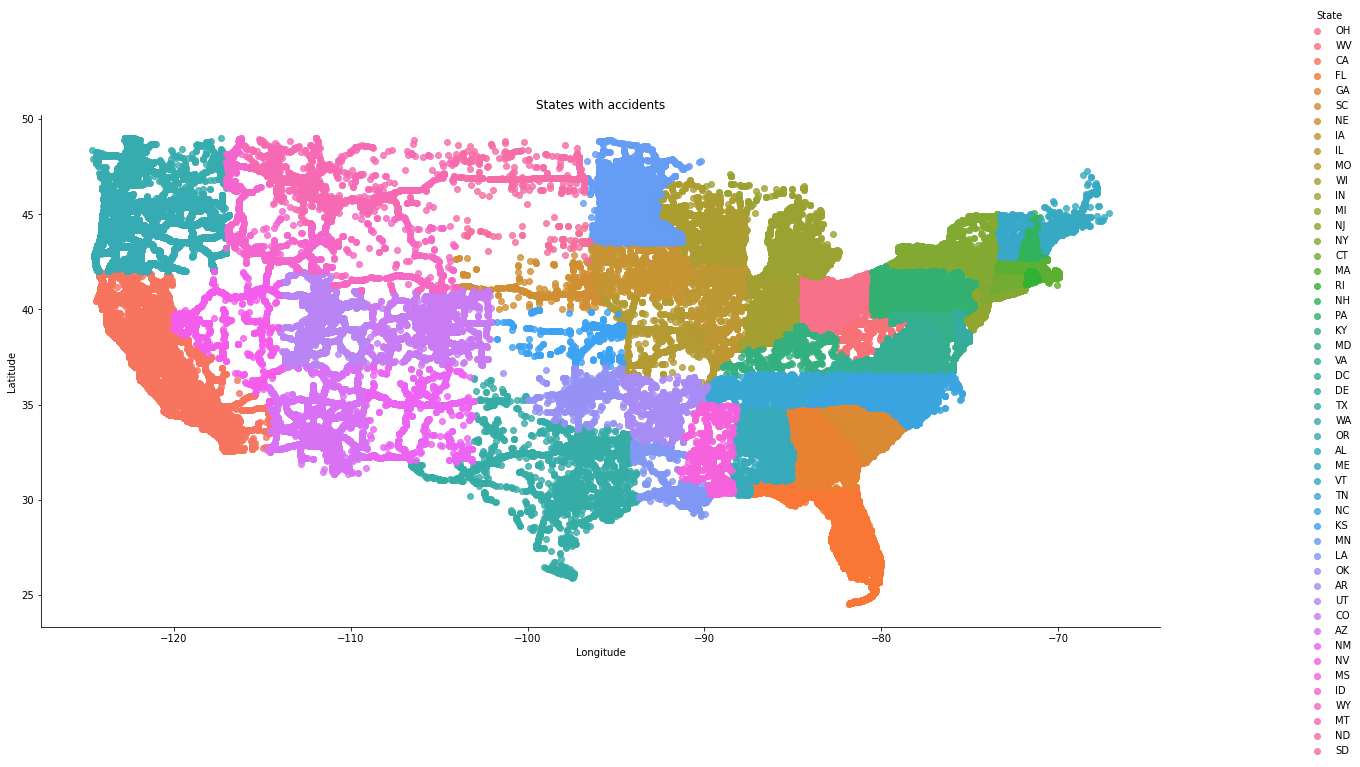

In [18]:
g=sns.lmplot(data=df,x='Start_Lng', y='Start_Lat',hue='State', fit_reg=False)
g.fig.set_size_inches(20,8)
plt. title('States with accidents')
plt. xlabel('Longitude')
plt. ylabel('Latitude');

The scatterplot looks nice, but at the same time, it is alarming that almost every corner of the USA is covered, meaning that the accidents occurred over a large number of locations over the past few years.

To get a clear idea, I have plotted the accident’s site using the coordinates given in the dataset on the USA map for each severity.


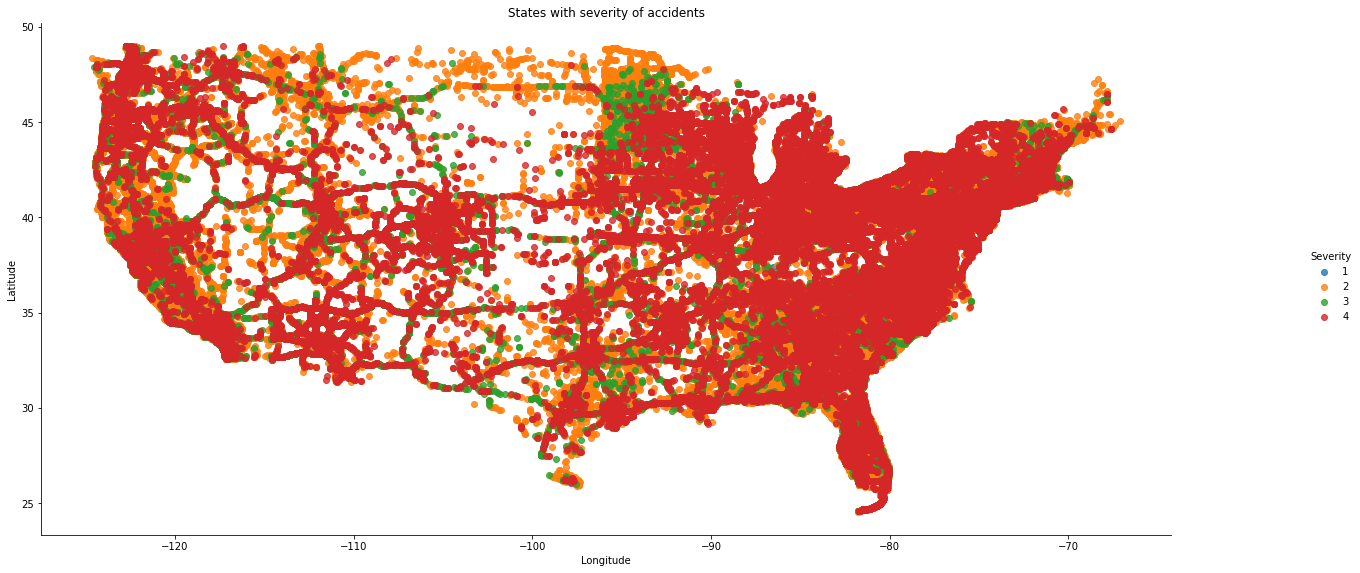

In [65]:
g=sns.lmplot(data=df,x='Start_Lng', y='Start_Lat',hue='Severity', fit_reg=False)
g.fig.set_size_inches(20,8)
plt. title('States with severity of accidents')
plt. xlabel('Longitude')
plt. ylabel('Latitude');

From the above plots, we can conclude that most numbers of accidents occurred in the Eastern and Western part of the USA, which accounts for the fact that most numbers of accidents took place in regions with timezone: Eastern Standard Time and Pacific Standard Time.

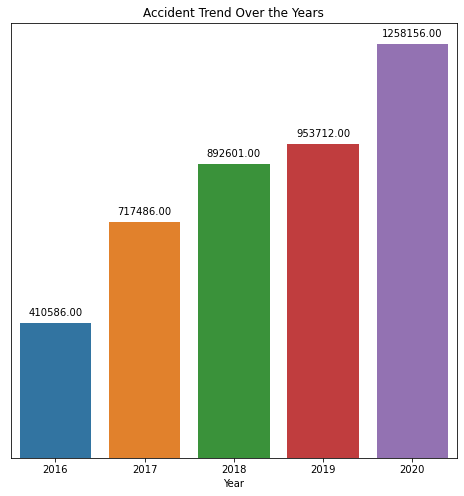

In [20]:
plt.figure(figsize=(8, 8))
splot = sns.countplot(data=df, x = 'year')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt. title('Accident Trend Over the Years')
plt. xlabel('Year')
splot.axes.get_yaxis().set_visible(False)


Number of Accidents were lower and showed a more significant change in the early years as compared with those in recent years when the number of accidents has been raised high.

In [21]:
cities = df.City.unique()
len(cities)

12250

As we can see there are 12,250 different cities in the given dataset. We can go ahead with the analysis as we know that USA has 19,495 cities so the number of cities in our data is a valid number.

In [22]:
states = df.State.unique()
len(states)

49

As we can see there are 49 different States in the given dataset. We can go ahead with the analysis as we know that USA has 52 States so the number of States in our data is a valid number.

In [23]:
cities_by_accident=df.City.value_counts()

In [24]:
from collections import Counter
def return_counter(data_frame, column_name, limit):
    return dict(Counter(data_frame[column_name].values).most_common(limit))

In [25]:
return_counter(df,'State',10)

{'CA': 972585,
 'TX': 376445,
 'FL': 370131,
 'SC': 212712,
 'NC': 193457,
 'NY': 189513,
 'PA': 136049,
 'VA': 127949,
 'IL': 111712,
 'OR': 108352}

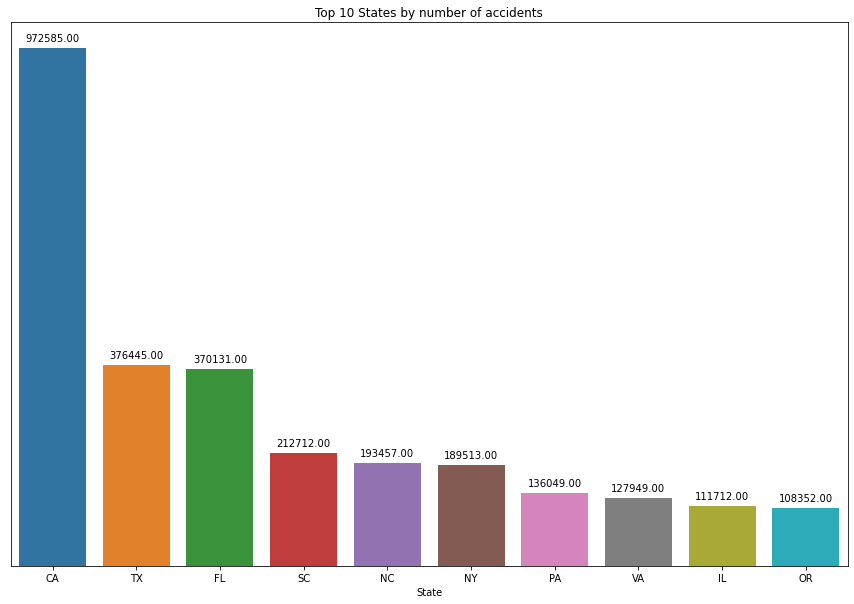

In [26]:
plt.figure(figsize=(15, 10))
splot = sns.countplot(data=df, x = 'State',order=df.State.value_counts().iloc[:10].index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt. title('Top 10 States by number of accidents')
plt. xlabel('State')
splot.axes.get_yaxis().set_visible(False)

We can see all the top 10 states with the highest number of accidents in the total dataset. And the sate CA is the major contributor for the number of accidents.

In [27]:
#Select all the data from the state with highest accident count
CA_state=df[df['State']=='CA']

In [28]:
CA_state.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year
728,A-729,MapQuest,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,0.0,Right hand shoulder blocked due to accident on...,Magazine St,...,False,False,False,False,False,Day,Day,Day,Day,2016
729,A-730,MapQuest,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,...,False,False,False,False,False,Day,Day,Day,Day,2016
730,A-731,MapQuest,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,0.0,Right lane blocked due to accident on CA-24 We...,I-680 N,...,False,False,False,False,False,Day,Day,Day,Day,2016
731,A-732,MapQuest,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,0.0,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,...,False,False,False,False,False,Day,Day,Day,Day,2016
732,A-733,MapQuest,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,0.0,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,...,False,False,False,False,False,Day,Day,Day,Day,2016


In [29]:
return_counter(CA_state,'City',10)

{'Los Angeles': 92702,
 'Sacramento': 38061,
 'San Diego': 29417,
 'San Jose': 22953,
 'Oakland': 15734,
 'Riverside': 15543,
 'Long Beach': 13197,
 'Anaheim': 12471,
 'San Bernardino': 12353,
 'San Francisco': 11223}

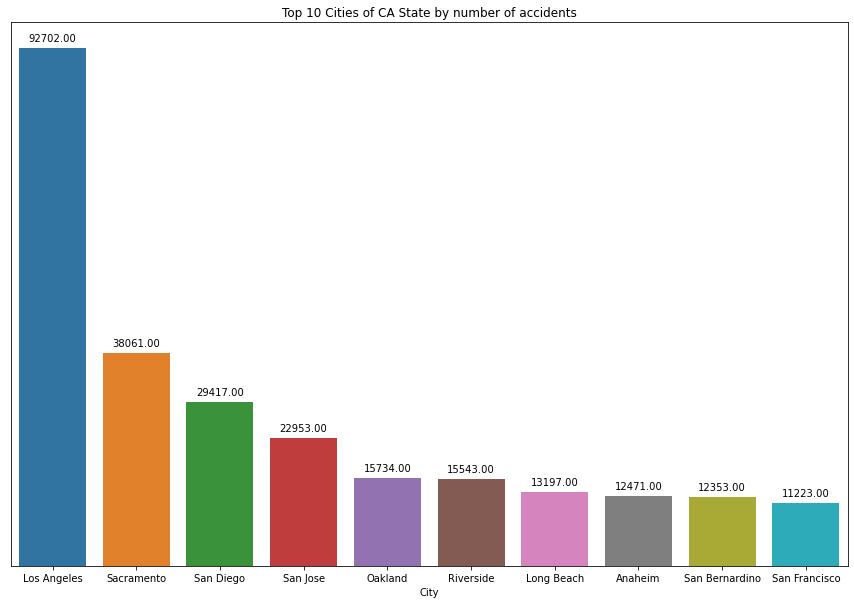

In [30]:
plt.figure(figsize=(15, 10))
splot = sns.countplot(data=CA_state, x = 'City',order=CA_state.City.value_counts().iloc[:10].index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt. title('Top 10 Cities of CA State by number of accidents')
plt. xlabel('City')
splot.axes.get_yaxis().set_visible(False)

We can see that Los Angeles is contributing the most in the CA state for the highest number of accidents.

In [31]:
return_counter(df,'City',10)

{'Houston': 114905,
 'Los Angeles': 92702,
 'Charlotte': 88888,
 'Dallas': 77303,
 'Austin': 70538,
 'Miami': 63166,
 'Raleigh': 52876,
 'Atlanta': 46328,
 'Baton Rouge': 42814,
 'Nashville': 41850}

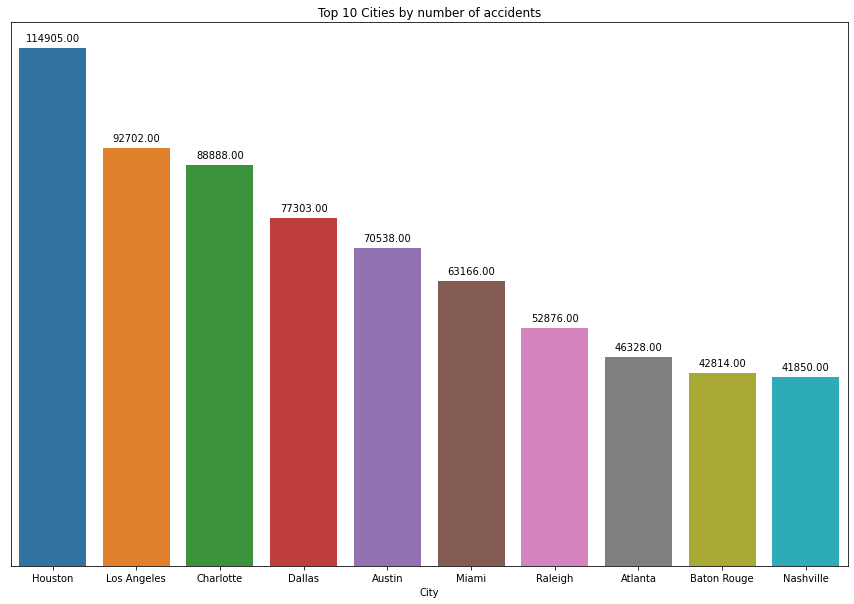

In [32]:
plt.figure(figsize=(15, 10))
splot = sns.countplot(data=df, x = 'City',order=df.City.value_counts().iloc[:10].index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt. title('Top 10 Cities by number of accidents')
plt. xlabel('City')
splot.axes.get_yaxis().set_visible(False)

As we can see from the plot these are the top 10 cities with the higest number of recored accidents. In which huston and log angeles have the highest values. 

In [33]:
#Lets bin the values into high and low number of accidents lets set the thershold as 1000(its just an assumption)
high_no_accidents=cities_by_accident[cities_by_accident>=1000]
low_no_accidents=cities_by_accident[cities_by_accident<1000]

In [34]:
#Lets find out % of cities with high number of accidents
len(high_no_accidents)/len(cities)

0.05746938775510204

As we can see from the above dataset only 5% of the cities have high number of accidents.

In [35]:
len(cities_by_accident[cities_by_accident==1])

1267

We can see that over 1200 cities have reported only one accident, these cities can be dropped from our table if needed because they dont provide any significant information for our analysis.

In [36]:
return_counter(df,'Zipcode',10)

{'91761': 6508,
 '91706': 6397,
 '92507': 5355,
 '92407': 4950,
 '91765': 4819,
 '90703': 4538,
 '90012': 4519,
 '90248': 4478,
 '75243': 4334,
 '90805': 4309}

East and west coast has more accident compare to central areas. Texas is also showing a large number of accidents.

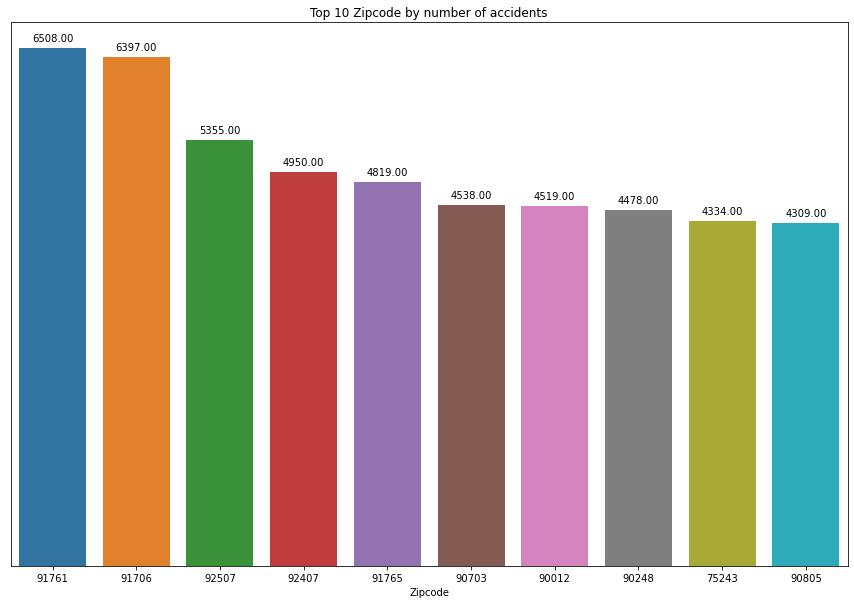

In [37]:
plt.figure(figsize=(15, 10))
splot = sns.countplot(data=df, x = 'Zipcode',order=df.Zipcode.value_counts().iloc[:10].index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
plt. title('Top 10 Zipcode by number of accidents')
plt. xlabel('Zipcode')
splot.axes.get_yaxis().set_visible(False)

Below are the top ten zip codes with their state and count of accidents happen. North Carolina has five zip codes in the top 10 lists, along with California, South Carolina, Texas, Michigan, and Louisiana.

In [38]:
df['start_hour']=df['Start_Time'].dt.hour

In [39]:
((df['start_hour'].value_counts())/len(df['start_hour'])*100).sort_values(ascending=False)

8     8.468483
7     8.268083
17    7.114308
16    6.960098
15    5.925542
18    5.600725
6     5.407674
9     5.234350
14    5.115296
13    4.863461
10    4.796102
11    4.794071
12    4.465190
19    3.944841
20    2.982984
5     2.894715
21    2.374909
22    2.129997
4     2.122106
23    1.552259
0     1.412272
1     1.313608
2     1.213526
3     1.045400
Name: start_hour, dtype: float64

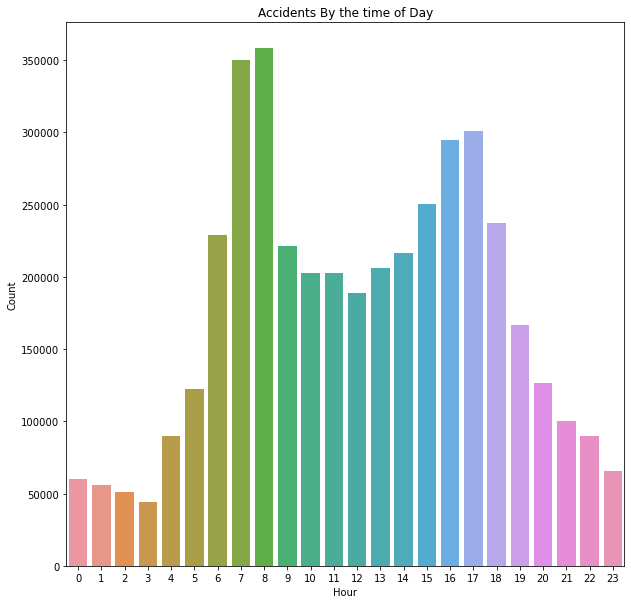

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(x="start_hour",data=df)
plt. title('Accidents By the time of Day')
plt. xlabel('Hour')
plt. ylabel('Count')
plt.show();

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
- Next higest percentage is 3 pm to 6 pm.
- Between 2016 and 2020, nighttime (10 PM-5 AM) is the safest time to travel which is showing less number of accidents.

In [41]:
df['month']=df['Start_Time'].dt.month

In [42]:
((df['month'].value_counts())/len(df['month'])*100).sort_values(ascending=False)

12    12.333324
11    11.667955
10    10.983615
9      9.006386
8      7.707781
6      7.332735
1      7.133564
4      7.075820
5      7.007729
3      6.931675
2      6.719226
7      6.100189
Name: month, dtype: float64

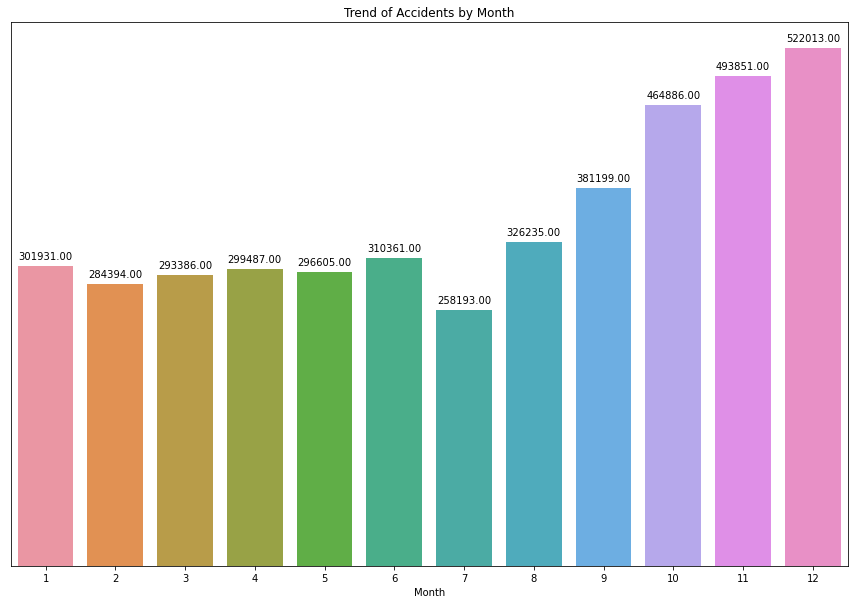

In [43]:
plt.figure(figsize=(15,10))
splot=sns.countplot(data=df,x="month")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
plt. title('Trend of Accidents by Month')
plt. xlabel('Month')
splot.axes.get_yaxis().set_visible(False)
plt.show();

Monthly accidents increase steadily from the lowest points in January and February, peak in October-December. First half showing a smaller number of accidents compared to the second half of the year. Monthly accident rates steadily increase from the lowest points in February, and peak in the last quarter of the year. This usually happens because there is high chance of accidents in the winter seasons because of the bad road conditons.

In [44]:
df['dayOfWeek'] = df['Start_Time'].dt.day_name()

In [45]:
((df['dayOfWeek'].value_counts())/len(df['dayOfWeek'])*100).sort_values(ascending=False)

Wednesday    17.669079
Friday       17.663715
Tuesday      17.593332
Thursday     17.553711
Monday       16.627813
Saturday      6.845864
Sunday        6.046486
Name: dayOfWeek, dtype: float64

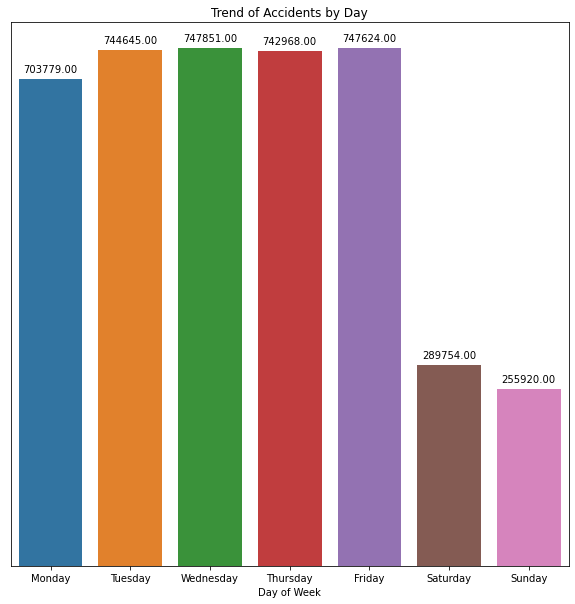

In [46]:
plt.figure(figsize=(10,10))
splot=sns.countplot(data=df,x="dayOfWeek")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
plt. title('Trend of Accidents by Day')
plt. xlabel('Day of Week')
splot.axes.get_yaxis().set_visible(False)
plt.show();

Between 2016 and 2020, there is a large number of accidents during weekdays (Monday to Friday). On the contrary, there are relatively fewer accidents on weekends (Saturday and Sunday)

In [47]:
#Lets get only the data from weekdays
weekday=df[(df['dayOfWeek']!='Saturday')&(df['dayOfWeek']!='Sunday')]

In [48]:
#Lets get only the data from weekends
weekend=df[(df['dayOfWeek']=='Saturday')|(df['dayOfWeek']=='Sunday')]

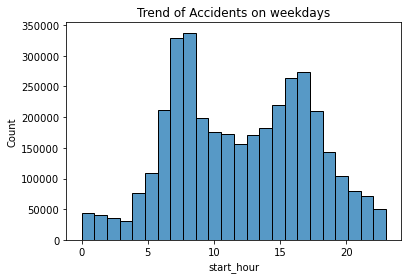

In [49]:
plt. title('Trend of Accidents on weekdays')
sns.histplot(weekday['start_hour'], bins=24);

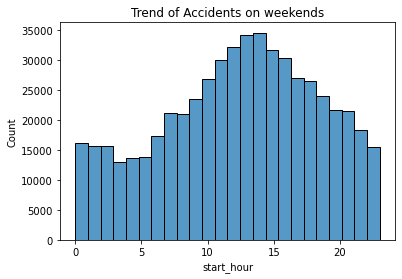

In [50]:
plt. title('Trend of Accidents on weekends')
sns.histplot(weekend['start_hour'], bins=24);

We can see from the above distribution the distribution on the weekends is more uniform where as the distribution in weekdays are more dependent on specific hours.

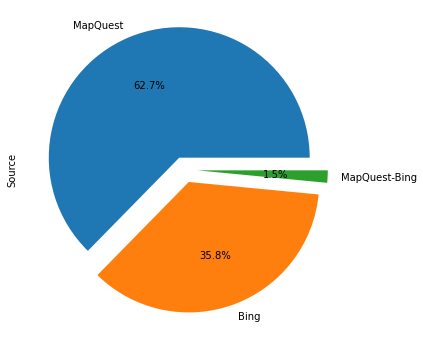

In [64]:
df.Source.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',figsize=(6,6));

In [52]:
df.Severity.value_counts()

2    3006626
3    1072821
4     123782
1      29312
Name: Severity, dtype: int64

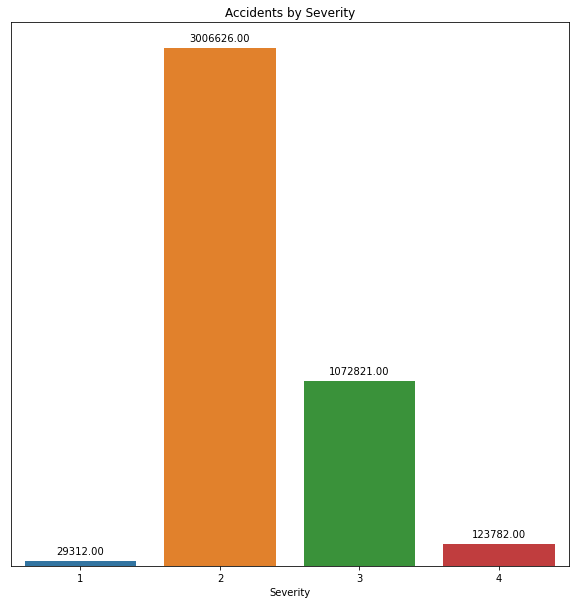

In [53]:
plt.figure(figsize=(10,10))
splot=sns.countplot(data=df,x="Severity")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
plt. title('Accidents by Severity')
plt. xlabel('Severity')
splot.axes.get_yaxis().set_visible(False)
plt.show();

Severity indicates the impact of the accident. Severity 3&4 having a high impact. Severity 2 accidents are more compare to severity 3&4. Severity 3&4 accidents mostly involve fatalities and severity 2, having injuries. Severity 1&2 accidents are reported primarily due to insurance claims.

In [54]:
#Fiding the number of weather types in our dataset
len(df.Weather_Condition.unique())

131

We can see there are 131 different types of weather conditions recored in our dataset during accidents

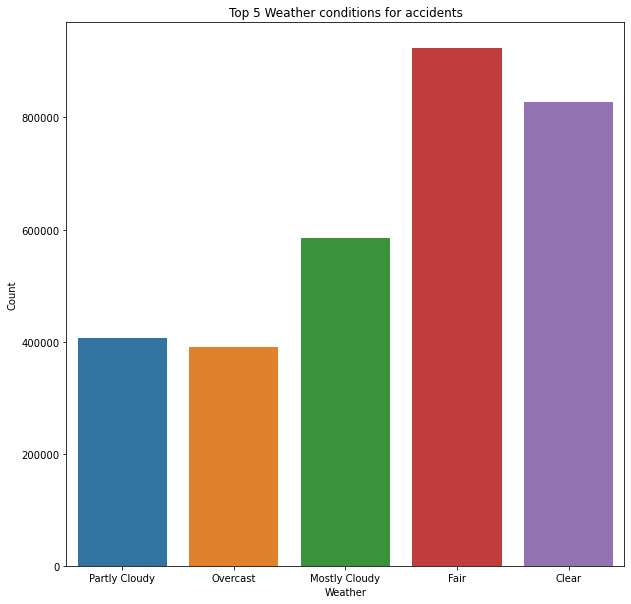

In [55]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df,
              x = 'Weather_Condition',
              order=df.Weather_Condition.value_counts().iloc[:5].index.sort_values(ascending=False))
plt. title('Top 5 Weather conditions for accidents')
plt. xlabel('Weather')
plt. ylabel('Count');

This was expected because as we can see the 4 out of the top 5 weather conditions have not idel driving conditions so the chances of accidents happening is high.

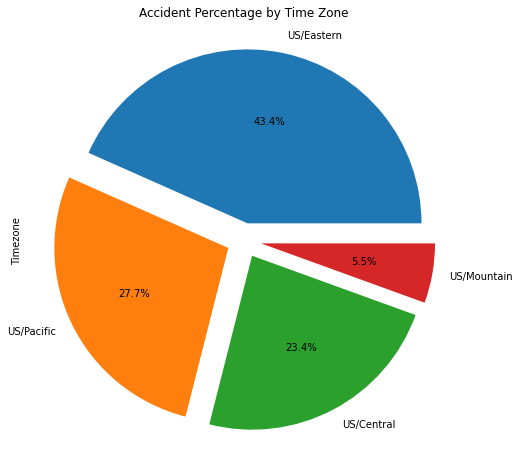

In [56]:
plt. title('Accident Percentage by Time Zone')
df.Timezone.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',figsize=(8,8));

Eastern time zone having the highest number of accidents around 43% than pacific, central, and Mountain time zone.

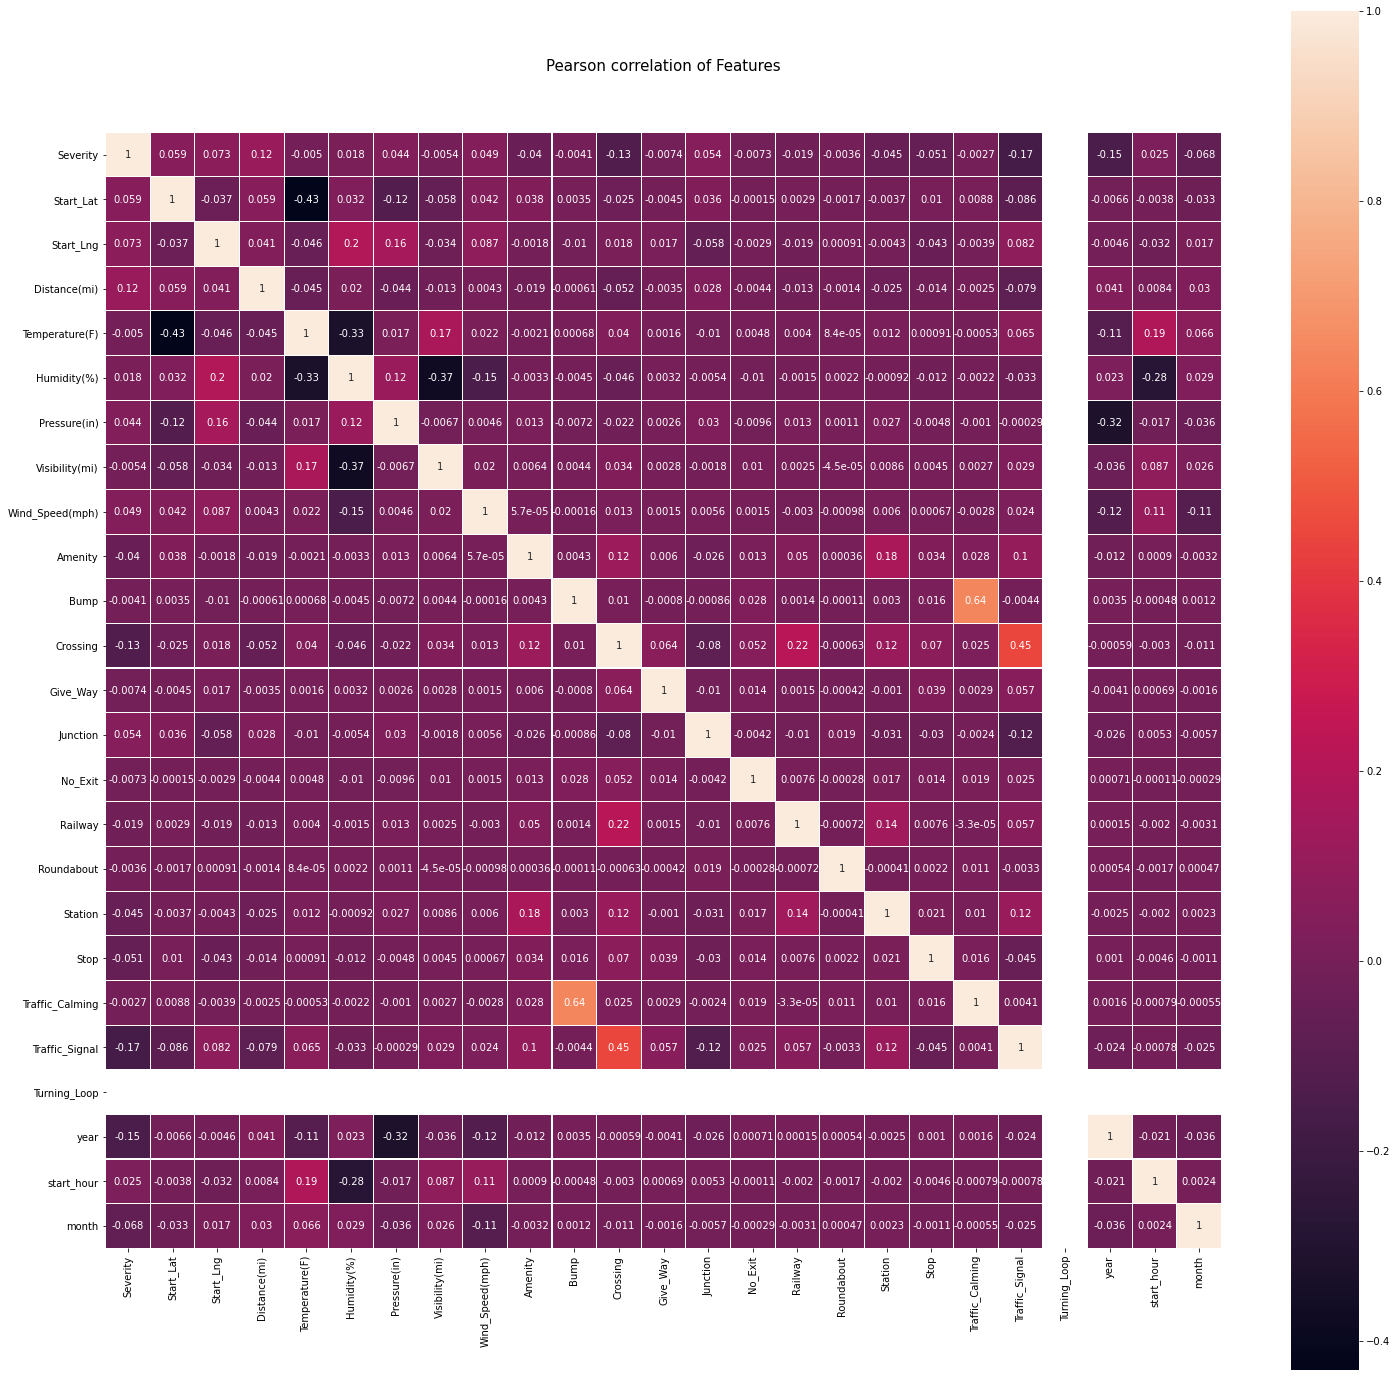

In [57]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(),square=True,annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15);

From the matrix, for accident Start Lat and End Lat are the crucial factors for the
accident. Temp and wind flow are playing an important role.

Lets consider severity 3 and 4 as deaths and lets check the number of deaths over the years.

In [58]:
death=df[(df['Severity']==3)|(df['Severity']==4)]

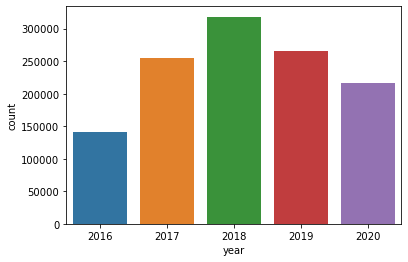

In [59]:
sns.countplot(x='year',data=death);

In the early years, it was low; after that, it has increased in the middle year 2018 and has reduced over the years again. This has happened because of all the safety features added to the cars in the modern automobile

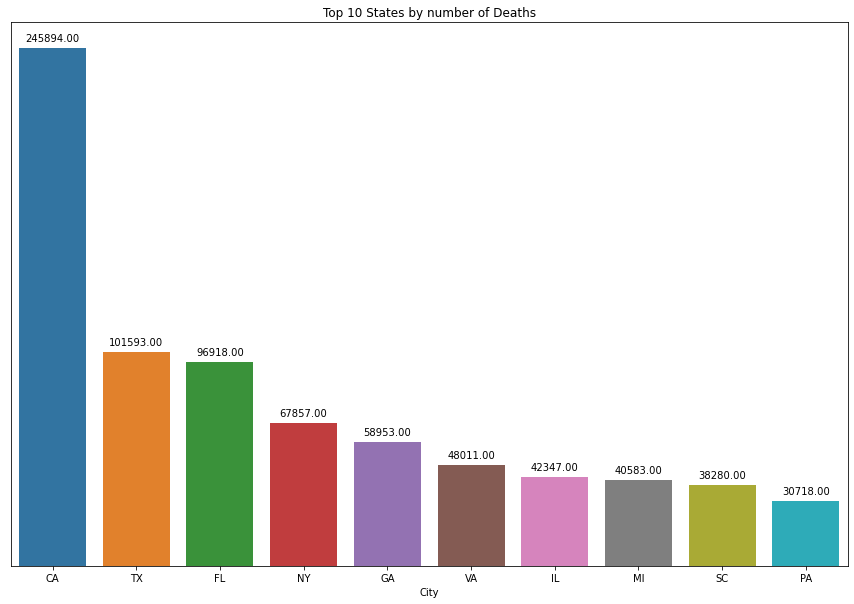

In [60]:
plt.figure(figsize=(15, 10))
splot = sns.countplot(data=death, x = 'State',order=death.State.value_counts().iloc[:10].index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt. title('Top 10 States by number of Deaths')
plt. xlabel('City')
splot.axes.get_yaxis().set_visible(False)

The highest number of deaths happened in California and then in Texas compare to other states.

In [61]:
#Lets see the duration of the accidents in our dataset
df['duration']=df['End_Time']-df['Start_Time']

The Start_Time and End_Time features depict the start and end time of an accident. To gain a better understanding, I have computed the duration of each accident. It is interesting to see that the duration of accidents varies from minutes to years.


In [62]:
df['duration'].dt.components[['days','hours','minutes']].value_counts().sort_values(ascending=False).head(10)

days  hours  minutes
0     0      29         1140235
             44          431934
      6      0           368816
      0      59          260655
             30          123096
             45          106965
             28           91781
      1      0            82908
             14           68835
      4      0            56150
dtype: int64

Around 36700,000 accidents had a duration of 6 hours, followed by 30 minutes.
A point to be noted is that the dataset description tells that Start_Time and End_Time represent the starting and ending time of the accident. Although the duration(which is calculated by taking the difference between Start_Time and End_Time) for some accidents comes out to be in hours or even in months and years, it is not evident that an accident lasted for a few days or years. Maybe the two features also include the repair time as well, not much can be concluded.